An analysis project that attempts to find the factors that might have led wives to pursue affairs. This is taken from a survey that was conducted in 1978

In [1]:
import pandas as pd
import statsmodels.api as statm
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
affairs = statm.datasets.fair.load_pandas().data #loading the dataset

In [3]:
affairs

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
affairs.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
#creating a categorical variable
affairs['had_affair'] = (affairs['affairs']>0)   

In [6]:
affairs.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True


In [7]:
#analysing the correlation between features
affairs.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
had_affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


In [8]:
affairs.describe() #checking the statistical features

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [9]:
affairs.isnull().sum() #checking if any null values are present

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
had_affair         0
dtype: int64

<AxesSubplot:>

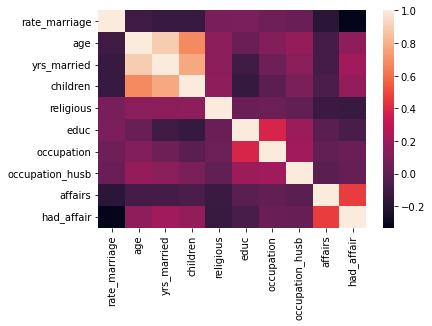

In [10]:
sns.heatmap(affairs.corr())  #creating a heatmap

In [11]:
#creating features and targets
affairs_features = affairs.drop(['affairs','had_affair'] , axis = 1)
affairs_target = affairs['had_affair']

In [12]:
affairs_features.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [13]:
affairs_target.head()

0    True
1    True
2    True
3    True
4    True
Name: had_affair, dtype: bool

In [14]:
decisiontree = DecisionTreeClassifier()
scores = cross_val_score(decisiontree, affairs_features , affairs_target , cv = 10)

In [15]:
print(scores.mean() , " : Average accuracy")

0.6610092513057473  : Average accuracy


In [16]:
decisiontree.fit(affairs_features,affairs_target)

DecisionTreeClassifier()

In [17]:
pd.DataFrame({'Features': affairs_features.columns, 'importance': decisiontree.feature_importances_}).sort_values('importance').tail(5)

,Features,importance
5,educ,0.122199
3,children,0.124537
2,yrs_married,0.133505
0,rate_marriage,0.142429
7,occupation_husb,0.182770


Husbands occupation , rate_marriage and children were the three features that were most important.
But the occupation feature is a categorical feature , we'll have to convert it numerical using dummies.

In [18]:
occupation_dummy = pd.get_dummies(affairs['occupation'], prefix= 'occu_').iloc[:,1:]

In [19]:
affairs = pd.concat([affairs, occupation_dummy], axis = 1)
affairs.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair,occu__2.0,occu__3.0,occu__4.0,occu__5.0,occu__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True,0,1,0,0,0


In [20]:
occupation_dummy_hus = pd.get_dummies(affairs['occupation_husb'], prefix= 'occu_hus_').iloc[:,1:]

In [21]:
affairs = pd.concat([affairs, occupation_dummy_hus] , axis = 1)

In [22]:
affairs.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair,occu__2.0,occu__3.0,occu__4.0,occu__5.0,occu__6.0,occu_hus__2.0,occu_hus__3.0,occu_hus__4.0,occu_hus__5.0,occu_hus__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True,0,1,0,0,0,0,0,1,0,0


In [23]:
affairs_cleaned = affairs.drop(['occupation','occupation_husb'], axis = 1)

In [24]:
affairs_cleaned.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,had_affair,occu__2.0,occu__3.0,occu__4.0,occu__5.0,occu__6.0,occu_hus__2.0,occu_hus__3.0,occu_hus__4.0,occu_hus__5.0,occu_hus__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,True,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,True,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,True,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,True,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,True,0,1,0,0,0,0,0,1,0,0


In [25]:
affairs_features = affairs_cleaned.drop(['affairs','had_affair'] , axis =1)
affairs_features.head()

,rate_marriage,age,yrs_married,children,religious,educ,occu__2.0,occu__3.0,occu__4.0,occu__5.0,occu__6.0,occu_hus__2.0,occu_hus__3.0,occu_hus__4.0,occu_hus__5.0,occu_hus__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [26]:
affairs_target = affairs_cleaned['had_affair']

In [27]:
#creating the model again
decisiontree1 = DecisionTreeClassifier()
scores = cross_val_score(decisiontree1, affairs_features , affairs_target , cv = 10)

In [28]:
print(scores.mean() , " : Average accuracy")

0.6534702269877473  : Average accuracy


In [29]:
decisiontree.fit(affairs_features,affairs_target)

DecisionTreeClassifier()

In [30]:
pd.DataFrame({'Features': affairs_features.columns, 'importance': decisiontree.feature_importances_}).sort_values('importance').tail(3)

,Features,importance
3,children,0.131890
2,yrs_married,0.133275
0,rate_marriage,0.139784


The most important features were rate-marriage , children and yrs_married.